Predicting Salaries with Decision Trees
=======================================


![title](img/tree_5000_blank.png)

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree


In [2]:
attribute_names = (
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'salary-class',
)


Read a CSV data file.

In [3]:
df = pd.read_csv("adult.data",names=attribute_names, sep=", ",engine="python")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Pre-process the data.  First, remove unwanted variables.

In [4]:
excludes = (
    'fnlwgt', 
    'education-num',
    'capital-gain', 
    'capital-loss'
)
for i in excludes:
    del df[i]
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


Boolean variables to 0s and 1s.

In [5]:
booleans = (
    'sex', 
    'native-country', 
    'salary-class'
)
for i in booleans:
    df[i] = df[i].astype('category')
    df[i] = df[i].cat.codes
df.head()


,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,40,39,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,13,39,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,40,39,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,39,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,5,0


 One-hot encoding of all categorical attributes.

In [6]:
categoricals = (
    'workclass', 
    'education', 
    'marital-status', 
    'occupation', 
    'relationship', 
    'race'
)
for i in categoricals:
    df = pd.concat([df, pd.get_dummies(df[i],prefix=i)], axis=1)
    del df[i]
df.head()

,age,sex,hours-per-week,native-country,salary-class,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,1,40,39,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,1,13,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,1,40,39,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,53,1,40,39,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,0,40,5,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


Extract attributes (X) and class labels (y).

In [7]:
y = df["salary-class"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: salary-class, dtype: int8

In [8]:
X = df.copy()
X = X.drop(columns="salary-class")
X.head()

,age,sex,hours-per-week,native-country,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,1,40,39,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,1,13,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,1,40,39,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,53,1,40,39,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,40,5,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


Split dataset into training and testing subsets.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=0
)
print("X_train = ", X_train.shape)
print("X_test = ", X_test.shape)
print("y_train = ", y_train.shape)
print("y_test = ", y_test.shape)


X_train =  (21815, 62)
X_test =  (10746, 62)
y_train =  (21815,)
y_test =  (10746,)


Construct a decision tree from this training data.

In [10]:
clf = DecisionTreeClassifier(
    random_state=0,
    criterion="entropy"
)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predict target class for the training set.

In [11]:
y_train_pred = clf.predict(X_train)
print(y_train_pred[0:10])
train_acc = accuracy_score(y_train, y_train_pred)
print("Training accuracy: ",train_acc)

[0 1 0 0 0 0 0 0 1 0]
Training accuracy:  0.9731377492550997


Predict target class for the testing set.

In [12]:
y_test_pred = clf.predict(X_test)
print(y_test_pred[0:10])
test_acc = accuracy_score(y_test, y_test_pred)
print("Testing accuracy: ",test_acc)

[0 0 0 1 0 0 0 0 0 0]
Testing accuracy:  0.7787083565978038


Check if dataset is balanced.

In [13]:
df["salary-class"].value_counts()

0    24720
1     7841
Name: salary-class, dtype: int64

Prune the decision tree.

min_sample_size =  2
Training accuracy:  0.9731377492550997
Testing accuracy:  0.7787083565978038
min_sample_size =  3
Training accuracy:  0.9588815035526014
Testing accuracy:  0.7846640610459706
min_sample_size =  5
Training accuracy:  0.9442126976850791
Testing accuracy:  0.7877349711520566
min_sample_size =  10
Training accuracy:  0.918771487508595
Testing accuracy:  0.7944351386562442
min_sample_size =  20
Training accuracy:  0.893651157460463
Testing accuracy:  0.8078354736646194
min_sample_size =  50
Training accuracy:  0.8680724272289709
Testing accuracy:  0.8153731621068304
min_sample_size =  100
Training accuracy:  0.856429062571625
Testing accuracy:  0.8237483714870649
min_sample_size =  250
Training accuracy:  0.8407059362823746
Testing accuracy:  0.8238414293690676
min_sample_size =  500
Training accuracy:  0.8343800137520055
Testing accuracy:  0.8238414293690676
min_sample_size =  750
Training accuracy:  0.8323630529452212
Testing accuracy:  0.8248650660710962
min_sample_s

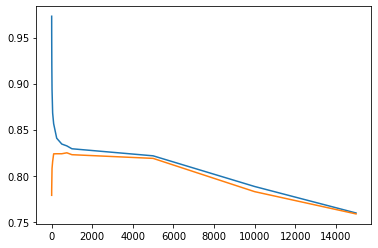

In [14]:
sizes =  [2,3,5,10,20,50,100,250,500,750,1000,5000,10000,15000]
train_accs = []
test_accs = []

for i in sizes:
    clf = DecisionTreeClassifier(
        random_state=0,
        criterion="entropy",
        min_samples_split=i
    )
    clf.fit(X_train,y_train)
    
    print("min_sample_size = ",i)
    
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    print("Training accuracy: ",train_acc)
    
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    print("Testing accuracy: ",test_acc)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
plt.plot(sizes, train_accs)
plt.plot(sizes, test_accs)
plt.show()

Graphical representation of a decision tree.

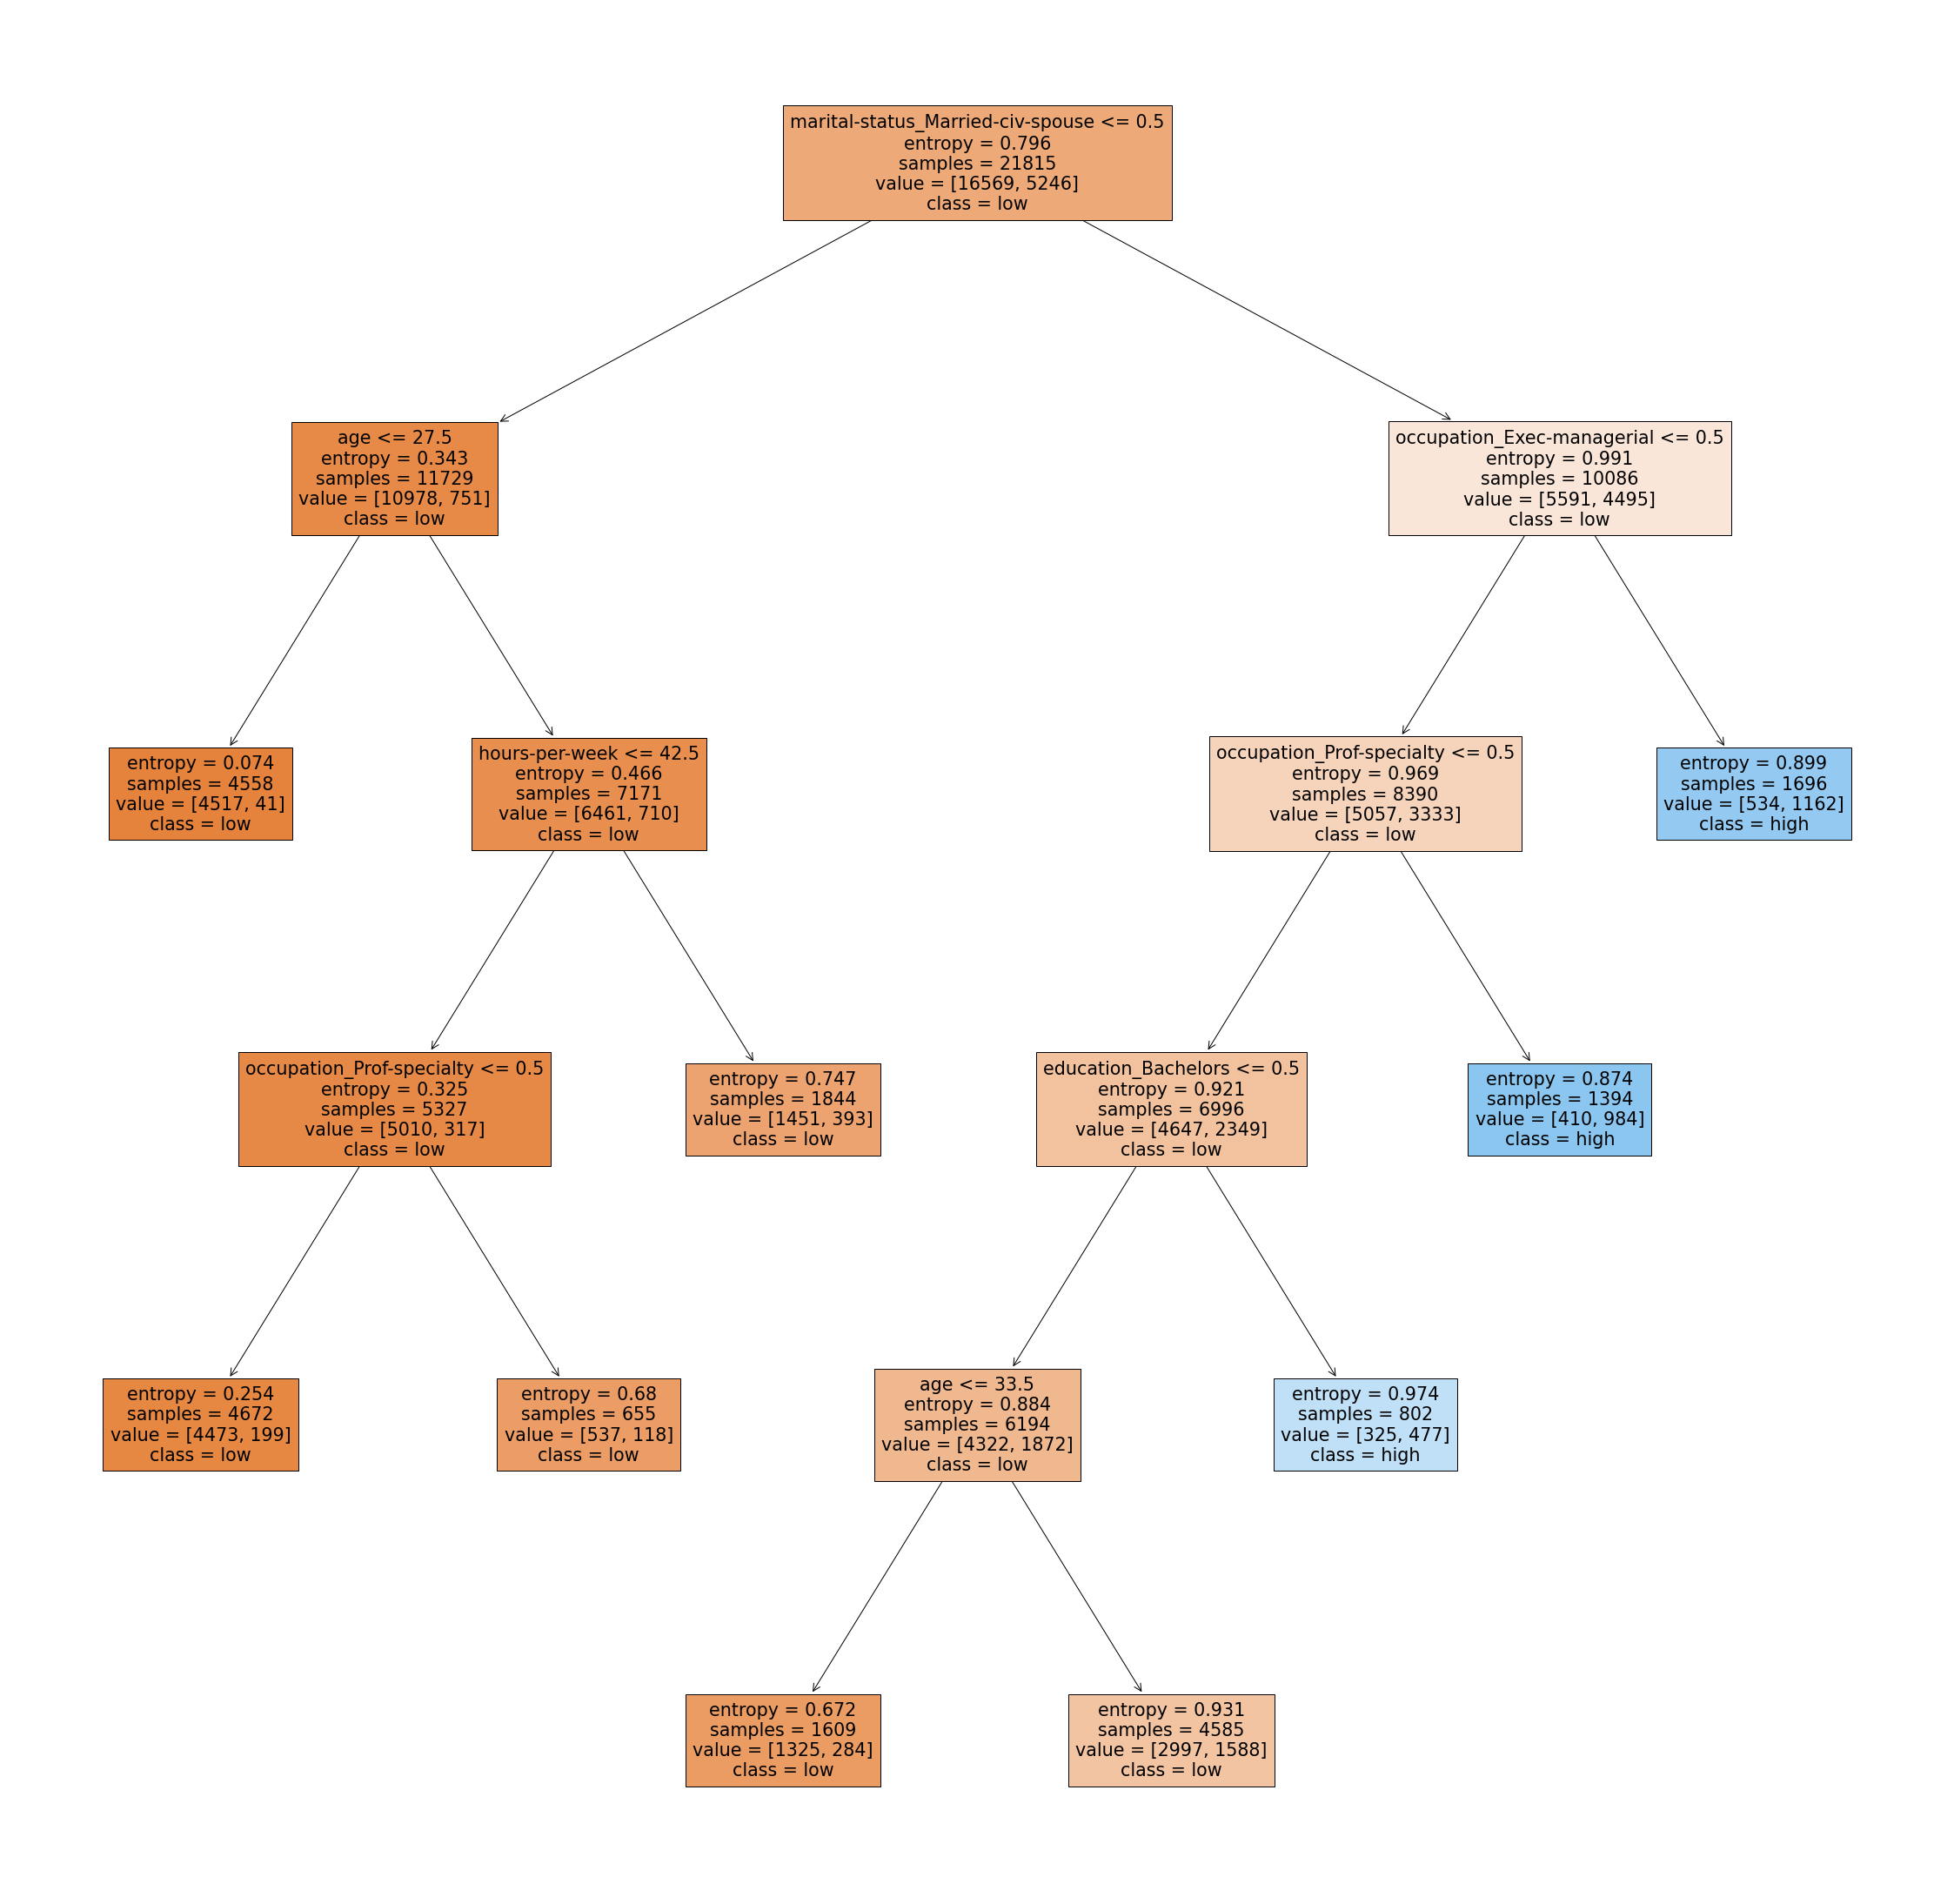

In [15]:
clf = DecisionTreeClassifier(
    min_samples_split=5000,
    criterion="entropy",
    random_state=0)
clf.fit(X_train,y_train)

fig = plt.figure(figsize=(40,40))
p = tree.plot_tree(
    clf,
    filled=True,
    feature_names = X_train.columns.to_list(),
    class_names = ("low","high")
)
fig.savefig("tree.png")